# CNN

### Instructions

- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by _Runtime -> Run all_. **Keep all cell outputs** for grading.


Install PyTorch and Skorch.


In [1]:
!pip3 install - q torch skorch torchvision torchtext sklearn numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
ERROR: Invalid requirement: '-'


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import skorch
import sklearn
import numpy as np
import matplotlib.pyplot as plt


## 1. Tensor Operations (20 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.


### 1) Tensor squeezing, unsqueezing and viewing


Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.


In [3]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(x)
print(x.shape)
print()
# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x = torch.Tensor.unsqueeze(x, 1)
x = torch.Tensor.unsqueeze(x, 3)
print(x)
print(x.shape)
print()
# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = torch.Tensor.squeeze(x, 3)
x = torch.Tensor.squeeze(x, 1)
print(x)
print(x.shape)
print()
# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x = torch.Tensor.view(x, 6)

print(x)
print(x.shape)


tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
torch.Size([3, 2])

tensor([[[[1.],
          [2.]]],


        [[[3.],
          [4.]]],


        [[[5.],
          [6.]]]])
torch.Size([3, 1, 2, 1])

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
torch.Size([3, 2])

tensor([1., 2., 3., 4., 5., 6.])
torch.Size([6])


### 2) Tensor concatenation and stack


Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.


In [4]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.

# Use torch.stack to generate such a z

z = torch.stack([x, y])

print(z)
print(z.shape)

# Use torch.cat and torch.unsqueeze to generate such a z
z = torch.cat([torch.Tensor.unsqueeze(x, 0), torch.Tensor.unsqueeze(y, 0)], 0)

print(z)
print(z.shape)


tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])
torch.Size([2, 3, 2])
tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])
torch.Size([2, 3, 2])


### 3) Tensor expansion


Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice.


In [5]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.

# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = torch.Tensor.unsqueeze(x, 0)

# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
x = x.expand(2, 3)
print(x)
print(x.shape)


tensor([[1., 2., 3.],
        [1., 2., 3.]])
torch.Size([2, 3])


### 4) Tensor reduction in a given dimension


In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.


In [6]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)

# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
# x_mean = torch.empty(10)
x_mean = x.mean(1)
print("x_mean", x_mean)
print()
# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = x.sum(1)
print("x_sum", x_sum)
print()
# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
x_max = x.max(1)
print("x_max", x_max)
print()
# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
x_min = x.min(1)
print("x_min", x_min)
print()
# Compute the top-5 values for each row of x.
# You need to generate a tensor x_mean of size (10, 5), and x_top[k, :] is the top-5 values of each row in x.
x_top = x.topk(5, 1)
print("x_top", x_top)
print()


x_mean tensor([-0.0110, -0.1161, -0.1393, -0.0856, -0.0467, -0.1094, -0.1171, -0.3031,
        -0.0187,  0.0590])

x_sum tensor([ -0.5481,  -5.8070,  -6.9656,  -4.2824,  -2.3368,  -5.4701,  -5.8574,
        -15.1561,  -0.9359,   2.9483])

x_max torch.return_types.max(
values=tensor([2.4092, 1.9532, 2.3150, 1.3521, 2.8769, 1.8634, 1.6569, 1.6319, 2.7447,
        1.8399]),
indices=tensor([30, 32, 13, 22, 27, 29, 46, 35, 11, 40]))

x_min torch.return_types.min(
values=tensor([-1.9459, -2.4085, -2.3059, -2.7839, -2.0053, -2.2603, -3.3363, -2.1537,
        -2.2950, -1.4216]),
indices=tensor([ 4, 42, 38,  5, 25, 43,  7,  0, 12, 19]))

x_top torch.return_types.topk(
values=tensor([[2.4092, 1.9955, 1.6540, 1.6201, 1.3563],
        [1.9532, 1.4596, 1.4370, 1.4132, 1.3768],
        [2.3150, 2.1951, 1.5934, 1.3132, 1.0348],
        [1.3521, 1.2543, 1.1054, 1.0555, 1.0144],
        [2.8769, 2.5930, 1.9554, 1.9264, 1.7253],
        [1.8634, 1.7814, 1.6862, 1.6786, 1.5212],
        [1.6569, 1.5884, 

## Convolutional Neural Networks (40 points)


Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`. For this question, we use the default validation split generated by Skorch.


In [7]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True,
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)


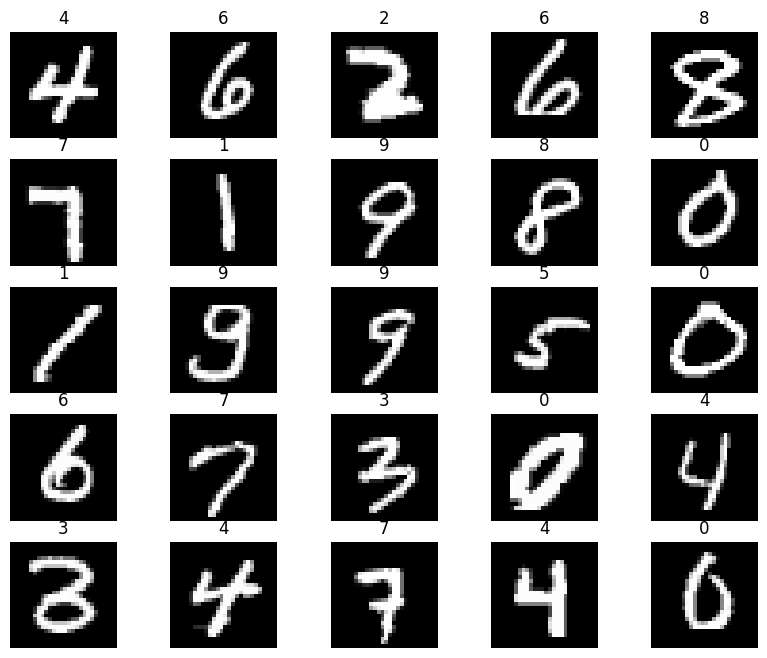

In [8]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.


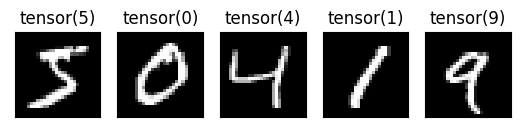

In [9]:
def plot(data, labels=None, num_sample=5):
    n = min(len(data), num_sample)
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        if labels is not None:
            plt.title(labels[i])


# train.labels = [train.classes[target] for target in train.targets]
plot(train_data.data, train_data.targets)


In [10]:
train_data.data.shape


torch.Size([60000, 28, 28])

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.


#### a) Implement convolutional layers


Implement the initialization function and the forward function of the CNN.


In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),

            nn.Conv2d(128, 128, 3, 1, 1),
            nn.ReLU(),

            nn.Conv2d(128, 128, 3, 1, 1),
            nn.ReLU()
        )

        self.fc1 = nn.Linear(128 * 28 * 28, 10)

    def forward(self, images):
        out = self.network(images)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        return out


cnn = CNN()
print(cnn)


CNN(
  (network): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
  )
  (fc1): Linear(in_features=100352, out_features=10, bias=True)
)


#### b) Tune hyperparameters


Train the CNN model on CIFAR-10 dataset. Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.


In [12]:
# implement input normalization & type cast here
train_data.data = train_data.data / 255
train_data.data = torch.Tensor.unsqueeze(train_data.data, 1)


In [25]:
# implement hyperparameters here
model = skorch.NeuralNetClassifier(CNN,
                                   optimizer=optim.SGD,
                                   device="cuda")
model.fit(train_data.data, train_data.targets)


torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Size([128, 128, 28, 28])
torch.Si

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN(
    (network): Sequential(
      (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
    )
    (fc1): Linear(in_features=100352, out_features=10, bias=True)
  ),
)

Write down **validation accuracy** of your model under different hyperparameter settings. Note the validation set is automatically split by Skorch during `model.fit()`.

**Hint:** You may need more epochs for SGD than Adam.

| #channel for each layer \ optimizer | SGD | Adam |
| ----------------------------------- | --- | ---- |
| (128, 128, 128)                     |     |      |
| (256, 256, 256)                     |     |      |
| (512, 512, 512)                     |     |      |


### 2) Full CNN implementation


Based on the CNN in the previous question, implement a full CNN model with max pooling layer.

- Add a max pooling layer after each convolutional layer.
- Each max pooling layer has a kernel size of 2 and a stride of 2.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table. You are also required to complete the questions.


#### a) Implement max pooling layers


Copy the CNN implementation in previous question. Implement max pooling layers.


In [33]:
class CNN_MaxPool(nn.Module):
    def __init__(self):
        super(CNN_MaxPool, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.fc1 = nn.Linear(128 * 3 * 3, 10)

    def forward(self, images):
        out = self.network(images)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        return out


CNN_MaxPool()


CNN_MaxPool(
  (network): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1152, out_features=10, bias=True)
)

#### b) Tune hyperparameters


Based on best optimizer you found in the previous problem, tune the number of channels and learning rate for best validation accuracy.


In [34]:
model = skorch.NeuralNetClassifier(CNN_MaxPool,
                                   optimizer=optim.SGD,
                                   criterion=torch.nn.CrossEntropyLoss,
                                   device="cuda")
model.fit(train_data.data, train_data.targets)


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN_MaxPool(
    (network): Sequential(
      (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU()
      (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (fc1): Linear(in_features=1152, out_features=10, bias=True)
  ),
)

Write down the **validation accuracy** of your model under different hyperparameter settings.

| #channel for each layer | validation accuracy |
| ----------------------- | ------------------- |
| (128, 128, 128)         |                     |
| (128, 256, 512)         |                     |
| (256, 256, 256)         |                     |
| (256, 512, 1024)        |                     |
| (512, 512, 512)         |                     |
| (512, 1024, 2048)       |                     |


For the best model you have, test it on the test set.

It is fine if you found some hyperparameter combination better than those listed in the tables.


In [ ]:
# implement the same input normalization & type cast here
test.predictions = model.predict(test.data)
sklearn.metrics.accuracy_score(test.targets, test.predictions)


How much **test accuracy** do you get?

**Your Answer:**


What can you conclude for the design of CNN structure?

**Your Answer:**


- **Subtask 2-1: Completing the Table**

We have provided the following table for different combinations of optimizers and learning rate, please write down the **validation accuracy** of your model with different optimizers and learning rates.

|         | 0.1 | 0.01 | 0.001 | 0.0001 |
| ------- | --- | ---- | ----- | ------ |
| SGD     |     |      |       |        |
| Adam    |     |      |       |        |
| RMSprop |     |      |       |        |


- **Subtask 2-2: Explaining your Observations**

Based on your results, briefly explain your observations, e.g., which optimizer works the best, what is the optimal learning rate for each optimizer?

_Your Answer:_


### 3) Compare the Results under Different Epoches


In this task, we hope to compare the results of our model under different training epoches, and answer a question.


- **Subtask 3-1: Completing the Table**

We have provided the following table, please write down the **training accuracy** and **validation accuracy** of your model under different epoches.

|                     | 10  | 20  | 30  | 40  | 50  |
| ------------------- | --- | --- | --- | --- | --- |
| Training Accuracy   |     |     |     |     |     |
| Validation Accuracy |     |     |     |     |     |


- **Subtask 3-2: Answering the Question**

Is it always better to train a model for more epoches? How can we decide when should we stop training?

_Your Answer:_
